# Dataset handling code

In [111]:
import os
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
labels_path = "./"

In [3]:
crack_imgs = [path for path in os.listdir(labels_path) if path.endswith("-c.png")]
delam_imgs = [path for path in os.listdir(labels_path) if not path.endswith("-c.jpg")]
all_imgs = [path for path in os.listdir(labels_path) if path.endswith(".jpg")]

FileNotFoundError: [Errno 2] No such file or directory: './images/new/'

In [ ]:
len(all_imgs)

In [7]:
img = cv2.imread("cologne_000000_000019_gtFine_labelTrainIds.png")

In [8]:
img.shape

(1024, 2048, 3)

In [9]:
np.unique(img)

array([  0,   1,   2,   4,   5,   6,   7,   8,  10,  11,  13, 255],
      dtype=uint8)

# Image Mixing 

In [2]:
images_dir = "./leftImg8bit/delamination/"
labels_dir = "./gtFine/delamination/"
save_dir   = "./leftImg8bit/merged/"
save_dir_l   = "./gtFine/merged/"

IMG_DIM = 256

In [3]:
images = [path for path in os.listdir(images_dir) if path.endswith(".png")]
labels = [path for path in os.listdir(labels_dir) if path.endswith(".png")]

np.random.shuffle(images)

In [4]:
print("no. of images: {}".format(len(images)))

no. of images: 4345


In [5]:
# randomly choose 2000 images to make 500 images by combining 4 for each. 
chosen_images = np.array(images[:4000])

# split the array to group of 4 each.
groups = np.array(np.split(chosen_images, 4)).T

In [108]:
1%2

1

In [6]:
for group in groups:       
    imgs   = [cv2.resize(cv2.imread(images_dir + path), (IMG_DIM, IMG_DIM)) for path in group]
    labels = [cv2.resize(cv2.imread(labels_dir + path), (IMG_DIM, IMG_DIM)) for path in group]
    
    row1 = np.concatenate((imgs[0], imgs[1]),  axis = 1)
    row1_l = np.concatenate((labels[0], labels[1]),  axis = 1)
    
    row2 = np.concatenate((imgs[2], imgs[3]), axis = 1)
    row2_l = np.concatenate((labels[2], labels[3]), axis = 1)
    
    
    final   = cv2.resize(np.concatenate((row1, row2), axis=0), (480, 480))
    final_l = cv2.resize(np.concatenate((row1_l, row2_l), axis=0), (480, 480))
    
    
    
    
    
    name = "mx-{}-{}-{}-{}.png".format(group[0][:-4], group[1][:-4],group[2][:-4],group[3][:-4])
    
    cv2.imwrite(save_dir + name, final )
    cv2.imwrite(save_dir_l + name, final_l)
    
#    

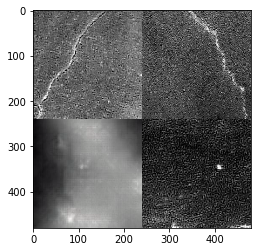

In [7]:
plt.imshow(final)

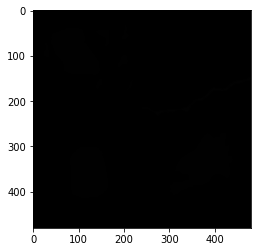

In [117]:
plt.imshow(final_l)

In [102]:
img = cv2.imread(images_dir + images[0])

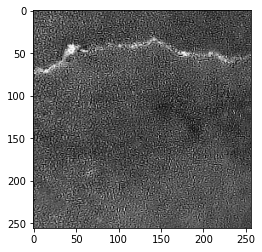

In [19]:
plt.imshow(img)

# txt files generator

In [118]:
import random

In [119]:
output_file = "cityscapes_train_list"
folder = "GAN_del_augmented"

In [120]:
images = [path for path in os.listdir("./leftImg8bit/" + folder) if path.endswith(".png")]

images.sort()
random.shuffle(images)
print("length of images found: ", len(images))

length of images found:  500


In [121]:
images[:5] # names of first 5 images in folder 

['31180.png', '32_455270.png', '43_455Hf.png', '37270.png', '31_432270.png']

In [122]:
with open('cityscapes_train_list_{}.txt'.format(folder), 'w') as f:
    for path in images:   
        str = "leftImg8bit/{}/{} gtFine/{}/{}\n".format(folder,path, folder, path)
        f.write(str)

# jpg to png only

In [ ]:
for path in all_imgs:
    img = np.asarray(cv2.imread(labels_path + path))
    cv2.imwrite("./images/new2/" + path[:-3] + "png", img)

# LABELS CLASS ASSOCIATION

In [81]:
labels_path="./gtFine/GAN_del_rgb/"
crack_imgs = [path for path in os.listdir(labels_path) if path.endswith(".png") or path.endswith(".jpg")]
print("crack images:", len(crack_imgs))

crack images: 100


In [3]:
# change class symbols

In [4]:
# for path in crack_imgs:
#     img = np.array(cv2.imread(labels_path + path, 0))
# #   0: del, 1: crack, 255: back
#     img[img == 1] = 2
#     img[img == 0] = 1
# #   1: del, 2:crack, 255: back 
#     path = "./gtFine/new/" + path
#     cv2.imwrite(path, img)    

This block replaces color with class ID

In [83]:
thresh = 10
CLASS = 1
for path in crack_imgs:
    img = np.array(cv2.imread("./gtFine/GAN_del_rgb/" + path, 0))
    img[img < thresh] = 0
    img[img >= thresh] = CLASS
    cv2.imwrite("./gtFine/GAN_del_rgb/labels/" + path[:-3] + "png", img)
    print(np.unique(img, return_counts=True))
#     plt.imshow(img)
#     break

(array([0, 1], dtype=uint8), array([60414,  5122]))
(array([0, 1], dtype=uint8), array([54459, 11077]))
(array([0, 1], dtype=uint8), array([59177,  6359]))
(array([0, 1], dtype=uint8), array([54577, 10959]))
(array([0, 1], dtype=uint8), array([60130,  5406]))
(array([0, 1], dtype=uint8), array([57982,  7554]))
(array([0, 1], dtype=uint8), array([60421,  5115]))
(array([0, 1], dtype=uint8), array([59517,  6019]))
(array([0, 1], dtype=uint8), array([59865,  5671]))
(array([0, 1], dtype=uint8), array([57424,  8112]))
(array([0, 1], dtype=uint8), array([51618, 13918]))
(array([0, 1], dtype=uint8), array([61601,  3935]))
(array([0, 1], dtype=uint8), array([50470, 15066]))
(array([0, 1], dtype=uint8), array([53198, 12338]))
(array([0, 1], dtype=uint8), array([58771,  6765]))
(array([0, 1], dtype=uint8), array([53209, 12327]))
(array([0, 1], dtype=uint8), array([50876, 14660]))
(array([0, 1], dtype=uint8), array([58832,  6704]))
(array([0, 1], dtype=uint8), array([56493,  9043]))
(array([0, 1

# Augmentation tests

In [3]:
# images
images = [path for path in os.listdir("./leftImg8bit/delamination") if path.endswith(".png")]

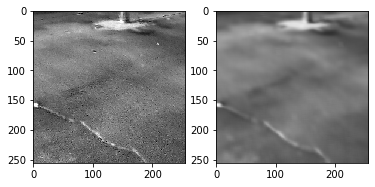

In [33]:
path = images[50]
img = cv2.imread("./leftImg8bit/delamination/" + path)
dst = cv2.fastNlMeansDenoising(img,None,35,25,9)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()

# image testing for pixels

In [69]:
# image = cv2.imread("./gtFine/GAN_crack/16_226.png")
# image = cv2.imread("./gtFine/GAN_crack/16_227.png")
import matplotlib.image as mpimg
image = np.array(cv2.imread("./gtFine/GAN_crack/16_227.png", 0))
# cv2.imwrite("out.png", image)

In [70]:
image.shape

(256, 256)

In [9]:
image[image == 2] = 255

In [55]:
image[image<=0]=0
image[image>0] =255

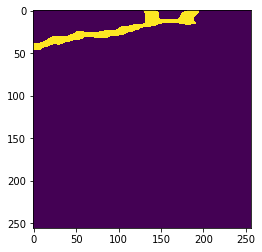

In [71]:
plt.imshow(image)

In [72]:
np.unique(image)

array([ 0, 76], dtype=uint8)

In [38]:
image[image==255] =255